In [3]:
import pandas as pd

# 1 - Load Data

In [5]:
df_titanic = pd.read_csv(filepath_or_buffer="../data/titanic_train.csv", sep=",")
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2 - EDA

In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 3 - Clean and Fill data 

In [9]:
df_titanic["Age"] = df_titanic["Age"].fillna(df_titanic["Age"].mean())

In [10]:
df_titanic = df_titanic.drop(["Cabin"], axis=1)

In [12]:
df_titanic = df_titanic.dropna()

In [14]:
df_titanic.count()


PassengerId    889
Survived       889
Pclass         889
Name           889
Sex            889
Age            889
SibSp          889
Parch          889
Ticket         889
Fare           889
Embarked       889
dtype: int64

In [16]:

df_titanic = df_titanic.drop(["Name", "PassengerId", "Ticket"], axis=1)

# 4 - Categorical data (Dummies)

In [17]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [18]:
dummies_sex = pd.get_dummies(df_titanic["Sex"], dtype=int, drop_first=True)


In [19]:
df_titanic = df_titanic.join(dummies_sex)


In [20]:
df_titanic = df_titanic.drop(["Sex"], axis=1)


In [21]:
dummies_embarked = pd.get_dummies(df_titanic["Embarked"], dtype=int, drop_first=True)


In [22]:
df_titanic = df_titanic.join(dummies_embarked)


In [23]:
df_titanic = df_titanic.drop(["Embarked"], axis=1)


In [24]:
df_titanic.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# 5 - Correlation

In [25]:
import seaborn as sns

<Axes: >

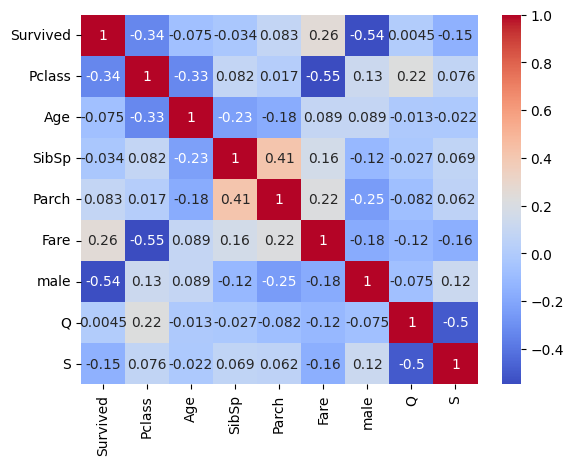

In [26]:
corr_matrix = df_titanic.corr()
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm")

In [27]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.255290
Parch       0.083151
Q           0.004536
SibSp      -0.034040
Age        -0.074673
S          -0.151777
Pclass     -0.335549
male       -0.541585
Name: Survived, dtype: float64

# 6 - Split features and labels


In [28]:
X = df_titanic.drop(["Survived"], axis=1)
y = df_titanic["Survived"]
print(X.shape)
print(y.shape)

(889, 8)
(889,)


In [30]:
# Split data in 2 parts: 1) Training set and testing set - 20% for testing

from sklearn.model_selection import train_test_split

# train_test_split outputs 4 elements

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(711, 8)
(178, 8)
(711,)
(178,)


# 7 - define and Train Model 

In [31]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=50)
model.fit(X_train, y_train)
prediction = model.predict(X_test)


# 8 - Evaluate Model

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.7528089887640449

# 9 - Model Iteration

In [36]:
results = []
for i in range(1,20):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    print(f"{i} result: {accuracy}")
    results.append(accuracy)

1 result: 0.7752808988764045
2 result: 0.7303370786516854
3 result: 0.8033707865168539
4 result: 0.7865168539325843
5 result: 0.7696629213483146
6 result: 0.7808988764044944
7 result: 0.797752808988764
8 result: 0.7921348314606742
9 result: 0.7752808988764045
10 result: 0.8033707865168539
11 result: 0.7865168539325843
12 result: 0.7921348314606742
13 result: 0.7752808988764045
14 result: 0.7752808988764045
15 result: 0.7696629213483146
16 result: 0.7640449438202247
17 result: 0.7808988764044944
18 result: 0.7921348314606742
19 result: 0.7752808988764045


In [47]:
# Find max value

import numpy as np

max_value = max(results)
max_index = [i+1 for i, v in enumerate(results) if v == max_value]

max_value
max_index


[3, 10]

<Axes: >

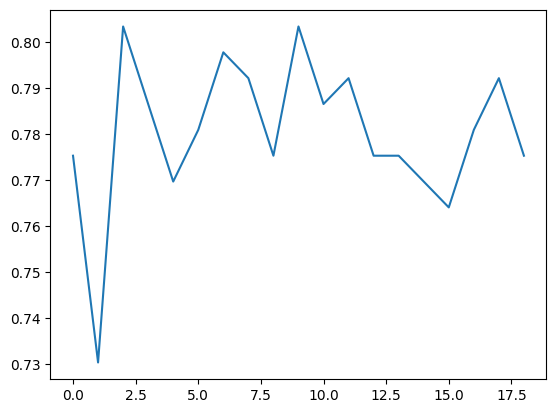

In [48]:
sns.lineplot(data=results)

In [51]:
# depth will be 3

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print(f"{i} result: {accuracy}")


19 result: 0.8033707865168539


In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       108
           1       0.79      0.69      0.73        70

    accuracy                           0.80       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178



In [53]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, prediction)

array([[95, 13],
       [22, 48]])

# Graph

In [54]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.5, 0.875, 'male <= 0.5\n0.471\n711\n[441, 270]\nLive'),
 Text(0.25, 0.625, 'Pclass <= 2.5\n0.383\n248\n[64, 184]\nDied'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Age <= 2.5\n0.096\n138\n[7, 131]\nDied'),
 Text(0.0625, 0.125, '0.5\n2\n[1, 1]\nLive'),
 Text(0.1875, 0.125, '0.084\n136\n[6, 130]\nDied'),
 Text(0.375, 0.375, 'Fare <= 23.35\n0.499\n110\n[57, 53]\nLive'),
 Text(0.3125, 0.125, '0.487\n88\n[37, 51]\nDied'),
 Text(0.4375, 0.125, '0.165\n22\n[20, 2]\nLive'),
 Text(0.75, 0.625, 'Age <= 13.0\n0.302\n463\n[377, 86]\nLive'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'SibSp <= 2.5\n0.452\n29\n[10, 19]\nDied'),
 Text(0.5625, 0.125, '0.1\n19\n[1, 18]\nDied'),
 Text(0.6875, 0.125, '0.18\n10\n[9, 1]\nLive'),
 Text(0.875, 0.375, 'Fare <= 26.269\n0.261\n434\n[367, 67]\nLive'),
 Text(0.8125, 0.125, '0.17\n320\n[290, 30]\nLive'),
 Text(0.9375, 0.125, '0.438\n114\n[77, 37]\nLive')]

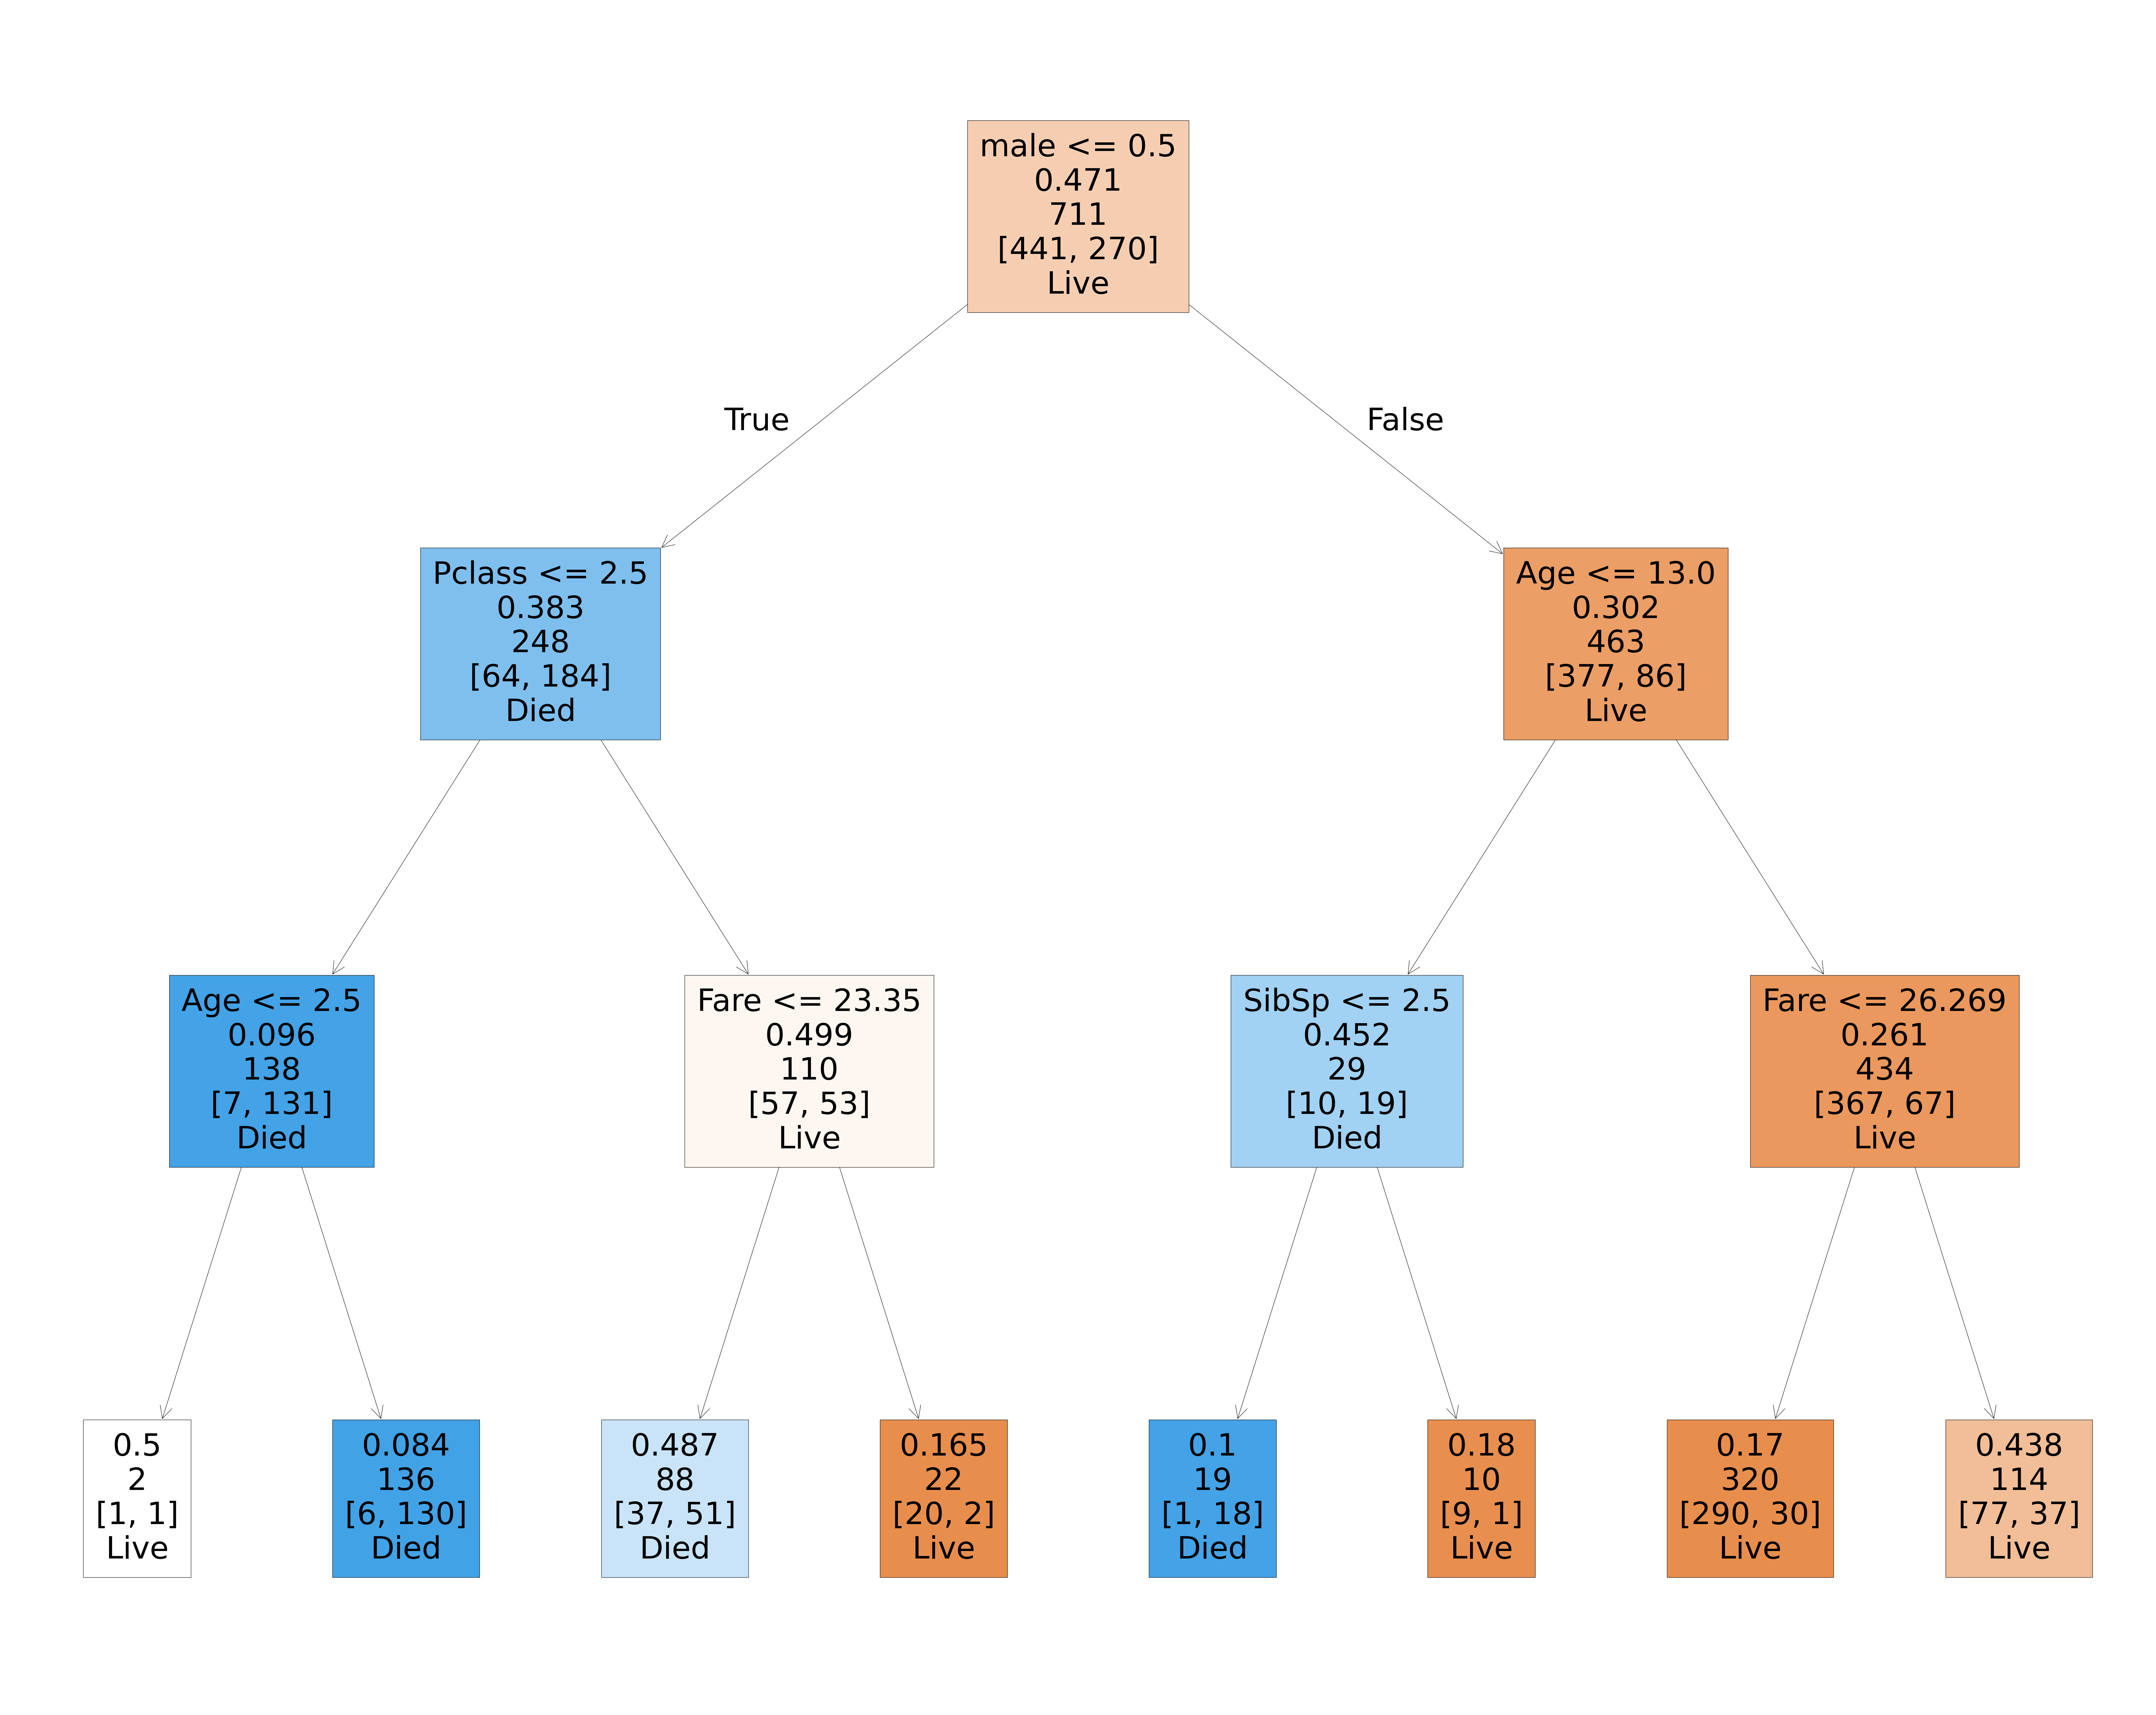

In [58]:
plt.figure(figsize=(100,80))
plot_tree(
    decision_tree=model,
    feature_names=X_train.columns,
    class_names=["Live", "Died"],
    filled=True,
    label="none"
)